# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1.) Import SPY, and select data from year 1999 onwards

In [2]:
spy_data = pd.read_csv('data/spy.csv')
spy_data
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
spy_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
spy_data = spy_data[spy_data['Date'].dt.year >= 1999]
spy_data


,Date,Close
2276,1999-01-04,1228.099976
2277,1999-01-05,1244.780029
2278,1999-01-06,1272.339966
2279,1999-01-07,1269.729980
2280,1999-01-08,1275.089966
...,...,...
8460,2023-08-02,4513.390137
8461,2023-08-03,4501.890137
8462,2023-08-04,4478.029785
8463,2023-08-07,4518.439941


## 2.) Import AAAvsTreasury (perceived riskiness of corporate debt compared to government debt) and select data from year 1999 onwards

In [3]:
aaavstreasury = pd.read_csv('data/aaavstreasury.csv')
aaavstreasury.dropna()
aaavstreasury.dtypes
aaavstreasury['Date'] = pd.to_datetime(aaavstreasury['Date'])
aaavstreasury.dtypes
aaavstreasury

aaavstreasury =aaavstreasury[aaavstreasury['Date'].dt.year >= 1999]

aaavstreasury

,Date,aaaVsTreasury
3999,1999-01-04,1.55
4000,1999-01-05,1.54
4001,1999-01-06,1.54
4002,1999-01-07,1.52
4003,1999-01-08,1.48
...,...,...
10143,2023-08-01,0.71
10144,2023-08-02,0.75
10145,2023-08-03,0.80
10146,2023-08-04,0.83


## 3.) Import VIX and select data from year 1999 onwards

In [4]:
vix = pd.read_csv('data/vix.csv')
vix['Date'] = pd.to_datetime(vix['Date'])
vix.dropna()
vix
vix = vix[vix['Date'].dt.year >= 1999]
vix

,Date,vix
2273,1999-01-04,26.17
2274,1999-01-05,24.46
2275,1999-01-06,23.34
2276,1999-01-07,24.37
2277,1999-01-08,23.28
...,...,...
8468,2023-08-02,16.09
8469,2023-08-03,15.92
8470,2023-08-04,17.10
8471,2023-08-07,15.77


## 4.) Import unemployment rate and select data from year 1999 onwards

In [5]:
unemp_rate = pd.read_csv('data/unemp_data.csv')
unemp_rate.dropna()
unemp_rate
unemp_rate['Date'] = pd.to_datetime(unemp_rate['Date'])
unemp_rate = unemp_rate[unemp_rate['Date'].dt.year >= 1999]
unemp_rate

,Date,unemp_rate
612,1999-01-01,4.3
613,1999-02-01,4.4
614,1999-03-01,4.2
615,1999-04-01,4.3
616,1999-05-01,4.2
...,...,...
902,2023-03-01,3.5
903,2023-04-01,3.4
904,2023-05-01,3.7
905,2023-06-01,3.6


## 5.) Import t10y3m and select data from year 1999 onwards

In [6]:
t10y3m = pd.read_csv('data/t10y3m.csv')
t10y3m['Date'] = pd.to_datetime(t10y3m['Date'])
t10y3m.dropna()
t10y3m
t10y3m = t10y3m[t10y3m['Date'].dt.year >= 1999]
t10y3m

,Date,t10y3m
4248,1999-01-04,0.20
4249,1999-01-05,0.26
4250,1999-01-06,0.26
4251,1999-01-07,0.33
4252,1999-01-08,0.38
...,...,...
10398,2023-08-02,-1.45
10399,2023-08-03,-1.34
10400,2023-08-04,-1.49
10401,2023-08-07,-1.47


## 6.) Import oil_price and select data from year 1999 onwards

In [7]:
oil_prices = pd.read_csv('data/oil_prices.csv')
oil_prices['Date'] = pd.to_datetime(oil_prices['Date'])
oil_prices.dropna()
oil_prices = oil_prices[oil_prices['Date'].dt.year >= 1999]
oil_prices

,Date,oilPrice
108,1999-01-01,12.435714
109,1999-02-01,12.004000
110,1999-03-01,14.660870
111,1999-04-01,17.310909
112,1999-05-01,17.743333
...,...,...
397,2023-02-01,77.027500
398,2023-03-01,73.348261
399,2023-04-01,79.126500
400,2023-05-01,71.673478


# Naive rule of buying SPY at the end of every month

In [8]:
# Get the price of SPY at the end of each month from 2000 to 2022
monthly_endofmonth_prices = {}

for year in range(2000, 2023):
    for month in range(1, 13):
        # Find the last day of the month
        last_day_of_month = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(0)

        # Find the nearest available trading day to the last day of the month, since SPY will not be updated on weekends or holidays
        while True:
            month_end_data = spy_data[spy_data['Date'] == last_day_of_month]
            if not month_end_data.empty:
                break
            else:
                last_day_of_month -= pd.Timedelta(days=1)

        # Get the SPY data for the nearest trading day
        month_end_price = month_end_data.iloc[0]['Close']
        monthly_endofmonth_prices[last_day_of_month] = month_end_price

monthly_endofmonth_prices_df = pd.DataFrame.from_dict(monthly_endofmonth_prices, orient='index')
monthly_endofmonth_prices_df = monthly_endofmonth_prices_df.rename(columns={0: "End of Month Price"})
monthly_endofmonth_prices_df.sort_index(inplace=True)
print(monthly_endofmonth_prices_df)


            End of Month Price
2000-01-31         1394.459961
2000-02-29         1366.420044
2000-03-31         1498.579956
2000-04-28         1452.430054
2000-05-31         1420.599976
...                        ...
2022-08-31         3955.000000
2022-09-30         3585.620117
2022-10-31         3871.979980
2022-11-30         4080.110107
2022-12-30         3839.500000

[276 rows x 1 columns]


In [9]:
end_price_2022_dec = monthly_endofmonth_prices_df.loc['2022-12-30', 'End of Month Price']
print(f'The end of year price for 2022 is ${end_price_2022_dec}')

monthly_endofmonth_prices_wo_finalprice = monthly_endofmonth_prices_df.drop('2022-12-30')
avg_price_of_spy_inPortfolio = monthly_endofmonth_prices_wo_finalprice['End of Month Price'].mean()
print(f'The average price of SPY in your portfolio would be: ${avg_price_of_spy_inPortfolio}')
print(f'The number of buying opportunites from 2000 to 2022 are: {len(monthly_endofmonth_prices_wo_finalprice.index)}')
naive_rule_profit = ((end_price_2022_dec-avg_price_of_spy_inPortfolio)/avg_price_of_spy_inPortfolio)*100
print(f'% profit/loss = {naive_rule_profit:.2f}%')

The end of year price for 2022 is $3839.5
The average price of SPY in your portfolio would be: $1868.1272713955966
The number of buying opportunites from 2000 to 2022 are: 275
% profit/loss = 105.53%


In [10]:
# convert the code to evaluate performance to a function for reusability
def eval_spy_stratergy(boy_year, eoy_year, end_of_year_price, dataframe_containing_spy_buying_opp, name_of_col_with_price, is_date_used_asIndex):
    print("=====")
    print(f'The end of year price for {eoy_year} is ${end_of_year_price}')
    avg_price_of_spy_inPortfolio = dataframe_containing_spy_buying_opp[f'{name_of_col_with_price}'].mean()
    print(f'The average price of SPY in your portfolio would be: ${avg_price_of_spy_inPortfolio}')
    print(f'The number of buying opportunites from {boy_year} to {eoy_year} are: {len(dataframe_containing_spy_buying_opp.index)}')
    profit = ((end_of_year_price-avg_price_of_spy_inPortfolio)/avg_price_of_spy_inPortfolio)*100
    print(f'% profit/loss = {profit:.2f}%')
    if (is_date_used_asIndex==True):
        years_with_buying_opportunities = dataframe_containing_spy_buying_opp.index.year.unique().tolist()
        num_months_with_buying_opportunities = dataframe_containing_spy_buying_opp.index.to_period('M').nunique()
        print(f'{len(years_with_buying_opportunities)} years and {num_months_with_buying_opportunities} months with buying opportunities: {years_with_buying_opportunities}')
        
        
    else:
        years_with_buying_opportunities = dataframe_containing_spy_buying_opp['Date'].dt.year.unique().tolist()
        num_months_with_buying_opportunities = dataframe_containing_spy_buying_opp.set_index('Date').index.to_period('M').nunique()
        print(f'{len(years_with_buying_opportunities)} years and {num_months_with_buying_opportunities} months with buying opportunities: {years_with_buying_opportunities}')
    
    print("=====")
    return profit, years_with_buying_opportunities, num_months_with_buying_opportunities

        


In [11]:
naive_results = eval_spy_stratergy(2000, 2022, end_price_2022_dec, monthly_endofmonth_prices_wo_finalprice, 'End of Month Price', True)

=====
The end of year price for 2022 is $3839.5
The average price of SPY in your portfolio would be: $1868.1272713955966
The number of buying opportunites from 2000 to 2022 are: 275
% profit/loss = 105.53%
23 years and 275 months with buying opportunities: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
=====


# Semi-intelligent rule 1: buy only when the close price is smaller than the moving average -1.96SD of 365 day window (95% CI)

In [12]:
spy_data_with_moving_avg = spy_data
spy_data_with_moving_avg['Moving Average'] = spy_data_with_moving_avg['Close'].rolling(window=365).mean()
spy_data_with_moving_avg['Moving std'] = spy_data_with_moving_avg['Close'].rolling(window=365).std()
spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std
2276,1999-01-04,1228.099976,NaN,NaN
2277,1999-01-05,1244.780029,NaN,NaN
2278,1999-01-06,1272.339966,NaN,NaN
2279,1999-01-07,1269.729980,NaN,NaN
2280,1999-01-08,1275.089966,NaN,NaN
...,...,...,...,...
8460,2023-08-02,4513.390137,4085.770119,238.238152
8461,2023-08-03,4501.890137,4086.103352,238.735744
8462,2023-08-04,4478.029785,4086.457215,239.221524
8463,2023-08-07,4518.439941,4087.042640,240.017360


In [13]:
spy_data_with_moving_avg['Value matches rule'] = spy_data_with_moving_avg['Close'] < (spy_data_with_moving_avg['Moving Average'] - 1.96*spy_data_with_moving_avg['Moving std'])
spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2276,1999-01-04,1228.099976,NaN,NaN,False
2277,1999-01-05,1244.780029,NaN,NaN,False
2278,1999-01-06,1272.339966,NaN,NaN,False
2279,1999-01-07,1269.729980,NaN,NaN,False
2280,1999-01-08,1275.089966,NaN,NaN,False
...,...,...,...,...,...
8460,2023-08-02,4513.390137,4085.770119,238.238152,False
8461,2023-08-03,4501.890137,4086.103352,238.735744,False
8462,2023-08-04,4478.029785,4086.457215,239.221524,False
8463,2023-08-07,4518.439941,4087.042640,240.017360,False


In [14]:
filtered_spy_data_with_moving_avg = spy_data_with_moving_avg[spy_data_with_moving_avg['Value matches rule']]
filtered_spy_data_with_moving_avg.dropna()
filtered_spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2773,2000-12-20,1264.739990,1405.657726,63.970678,True
2774,2000-12-21,1274.859985,1405.288520,64.335589,True
2814,2001-02-21,1255.270020,1404.043260,65.551693,True
2815,2001-02-22,1252.819946,1403.793095,65.953966,True
2816,2001-02-23,1245.859985,1403.545342,66.376729,True
...,...,...,...,...,...
8260,2022-10-13,3669.909912,4287.399724,285.940758,True
8261,2022-10-14,3583.070068,4285.798300,288.241163,True
8262,2022-10-17,3677.949951,4284.363588,289.959464,True
8264,2022-10-19,3695.159912,4281.607724,293.027386,True


In [15]:
# remove any dates >= 31 dec 2022
# Convert '2022-12-31' to a datetime object
date_threshold = pd.to_datetime('2022-12-31')

# Remove any dates >= 31 dec 2022
filtered_spy_data_with_moving_avg = filtered_spy_data_with_moving_avg[filtered_spy_data_with_moving_avg['Date'] < date_threshold]
filtered_spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2773,2000-12-20,1264.739990,1405.657726,63.970678,True
2774,2000-12-21,1274.859985,1405.288520,64.335589,True
2814,2001-02-21,1255.270020,1404.043260,65.551693,True
2815,2001-02-22,1252.819946,1403.793095,65.953966,True
2816,2001-02-23,1245.859985,1403.545342,66.376729,True
...,...,...,...,...,...
8260,2022-10-13,3669.909912,4287.399724,285.940758,True
8261,2022-10-14,3583.070068,4285.798300,288.241163,True
8262,2022-10-17,3677.949951,4284.363588,289.959464,True
8264,2022-10-19,3695.159912,4281.607724,293.027386,True


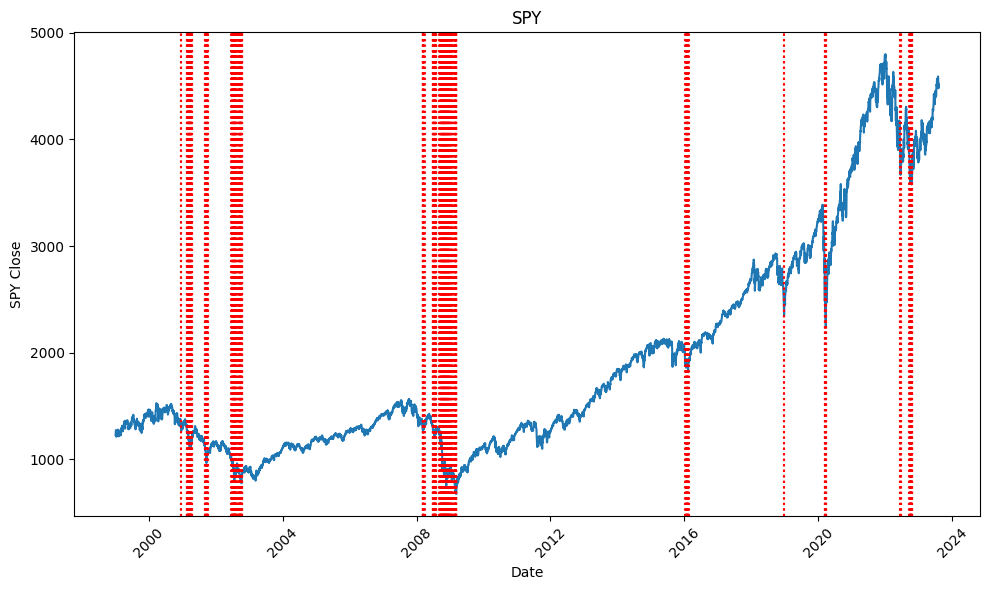

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Close'])
plt.xlabel('Date')
plt.ylabel('SPY Close')
plt.title('SPY')
plt.xticks(rotation=45)

# Add vertical lines for MonthYear values
for date in filtered_spy_data_with_moving_avg['Date']:
    plt.axvline(x=date, color='r', linestyle=':')

plt.tight_layout()
plt.savefig('figures/entrypoints/semi_int_rule1.png')
plt.show()


In [17]:
semi_int_rule1_results = eval_spy_stratergy(2000, 2020, end_price_2022_dec, filtered_spy_data_with_moving_avg, 'Close', False)

=====
The end of year price for 2020 is $3839.5
The average price of SPY in your portfolio would be: $1287.4026194807059
The number of buying opportunites from 2000 to 2020 are: 313
% profit/loss = 198.24%
9 years and 29 months with buying opportunities: [2000, 2001, 2002, 2008, 2009, 2016, 2018, 2020, 2022]
=====


# Semi-intelligent rule 2: buy only when the close price is smaller than the moving average -2.576SD of 365 day window (99% CI)

In [18]:
spy_data_with_moving_avg = spy_data
spy_data_with_moving_avg['Moving Average'] = spy_data_with_moving_avg['Close'].rolling(window=365).mean()
spy_data_with_moving_avg['Moving std'] = spy_data_with_moving_avg['Close'].rolling(window=365).std()
spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2276,1999-01-04,1228.099976,NaN,NaN,False
2277,1999-01-05,1244.780029,NaN,NaN,False
2278,1999-01-06,1272.339966,NaN,NaN,False
2279,1999-01-07,1269.729980,NaN,NaN,False
2280,1999-01-08,1275.089966,NaN,NaN,False
...,...,...,...,...,...
8460,2023-08-02,4513.390137,4085.770119,238.238152,False
8461,2023-08-03,4501.890137,4086.103352,238.735744,False
8462,2023-08-04,4478.029785,4086.457215,239.221524,False
8463,2023-08-07,4518.439941,4087.042640,240.017360,False


In [19]:
spy_data_with_moving_avg['Value matches rule'] = spy_data_with_moving_avg['Close'] < (spy_data_with_moving_avg['Moving Average'] - 2.576*spy_data_with_moving_avg['Moving std'])
spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2276,1999-01-04,1228.099976,NaN,NaN,False
2277,1999-01-05,1244.780029,NaN,NaN,False
2278,1999-01-06,1272.339966,NaN,NaN,False
2279,1999-01-07,1269.729980,NaN,NaN,False
2280,1999-01-08,1275.089966,NaN,NaN,False
...,...,...,...,...,...
8460,2023-08-02,4513.390137,4085.770119,238.238152,False
8461,2023-08-03,4501.890137,4086.103352,238.735744,False
8462,2023-08-04,4478.029785,4086.457215,239.221524,False
8463,2023-08-07,4518.439941,4087.042640,240.017360,False


In [20]:
filtered_spy_data_with_moving_avg = spy_data_with_moving_avg[spy_data_with_moving_avg['Value matches rule']]
filtered_spy_data_with_moving_avg.dropna()
filtered_spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2827,2001-03-12,1180.160034,1401.789780,69.747113,True
2828,2001-03-13,1197.660034,1401.556767,70.286019,True
2829,2001-03-14,1166.709961,1401.238684,71.083078,True
2830,2001-03-15,1173.560059,1400.879671,71.898740,True
2831,2001-03-16,1150.530029,1400.466465,72.898744,True
...,...,...,...,...,...
6579,2016-02-10,1851.859985,2036.738468,69.208083,True
6580,2016-02-11,1829.079956,2036.260961,70.035265,True
7613,2020-03-20,2304.919922,2908.378924,215.624841,True
7614,2020-03-23,2237.399902,2906.606239,218.463255,True


In [21]:
# remove any dates >= 31 dec 2022
# Convert '2022-12-31' to a datetime object
date_threshold = pd.to_datetime('2022-12-31')

# Remove any dates >= 31 dec 2022
filtered_spy_data_with_moving_avg = filtered_spy_data_with_moving_avg[filtered_spy_data_with_moving_avg['Date'] < date_threshold]
filtered_spy_data_with_moving_avg

,Date,Close,Moving Average,Moving std,Value matches rule
2827,2001-03-12,1180.160034,1401.789780,69.747113,True
2828,2001-03-13,1197.660034,1401.556767,70.286019,True
2829,2001-03-14,1166.709961,1401.238684,71.083078,True
2830,2001-03-15,1173.560059,1400.879671,71.898740,True
2831,2001-03-16,1150.530029,1400.466465,72.898744,True
...,...,...,...,...,...
6579,2016-02-10,1851.859985,2036.738468,69.208083,True
6580,2016-02-11,1829.079956,2036.260961,70.035265,True
7613,2020-03-20,2304.919922,2908.378924,215.624841,True
7614,2020-03-23,2237.399902,2906.606239,218.463255,True


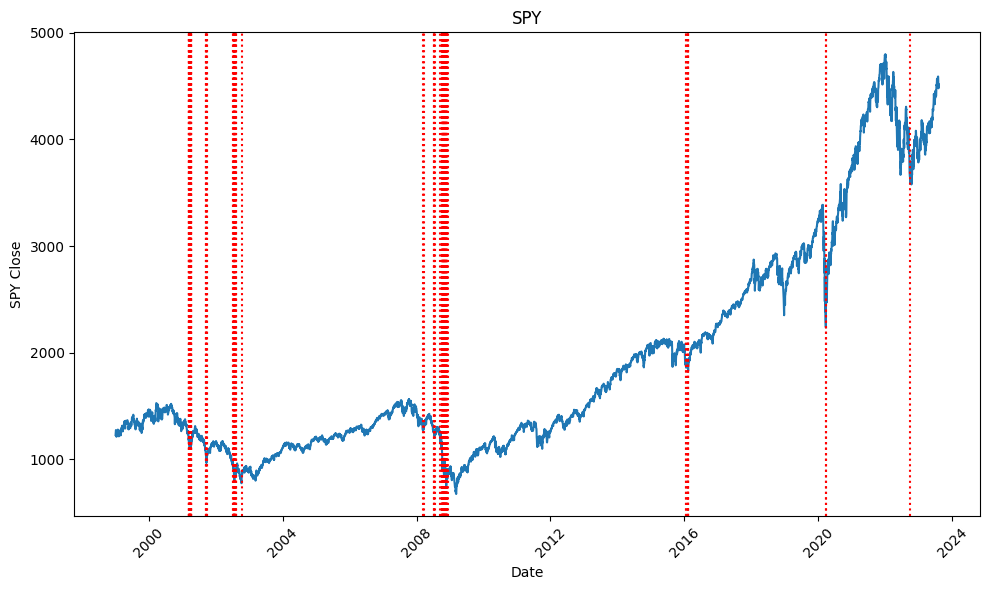

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Close'])
plt.xlabel('Date')
plt.ylabel('SPY Close')
plt.title('SPY')
plt.xticks(rotation=45)

# Add vertical lines for MonthYear values
for date in filtered_spy_data_with_moving_avg['Date']:
    plt.axvline(x=date, color='r', linestyle=':')

plt.tight_layout()
plt.savefig('figures/entrypoints/semi_int_rule2.png')
plt.show()


In [23]:
semi_int_rule2_results = eval_spy_stratergy(2000, 2020, end_price_2022_dec, filtered_spy_data_with_moving_avg, 'Close', False)

=====
The end of year price for 2020 is $3839.5
The average price of SPY in your portfolio would be: $1088.772617969698
The number of buying opportunites from 2000 to 2020 are: 103
% profit/loss = 252.64%
6 years and 16 months with buying opportunities: [2001, 2002, 2008, 2016, 2020, 2022]
=====


In [24]:
max_profit = 0
best_std_val = 0

profit_list = {}
num_months_list = {}
num_years_list = {}

for std_value in np.arange(0,7,0.01):
    print(f'current std_value used: {std_value}')
    spy_data_with_moving_avg = spy_data
    spy_data_with_moving_avg['Moving Average'] = spy_data_with_moving_avg['Close'].rolling(window=365).mean()
    spy_data_with_moving_avg['Moving std'] = spy_data_with_moving_avg['Close'].rolling(window=365).std()
    spy_data_with_moving_avg
    spy_data_with_moving_avg['Value matches rule'] = spy_data_with_moving_avg['Close'] < (spy_data_with_moving_avg['Moving Average'] - std_value*spy_data_with_moving_avg['Moving std'])
    spy_data_with_moving_avg
    filtered_spy_data_with_moving_avg = spy_data_with_moving_avg[spy_data_with_moving_avg['Value matches rule']]
    filtered_spy_data_with_moving_avg.dropna()
    filtered_spy_data_with_moving_avg
    # remove any dates >= 31 dec 2022
    # Convert '2022-12-31' to a datetime object
    date_threshold = pd.to_datetime('2022-12-31')

    # Remove any dates >= 31 dec 2022
    filtered_spy_data_with_moving_avg = filtered_spy_data_with_moving_avg[filtered_spy_data_with_moving_avg['Date'] < date_threshold]
    filtered_spy_data_with_moving_avg
    curr_profit, num_years, num_months = eval_spy_stratergy(2000, 2020, end_price_2022_dec, filtered_spy_data_with_moving_avg, 'Close', False)
    profit_list[std_value] = curr_profit
    num_months_list[std_value] = num_months
    num_years_list[std_value] = num_years

    if (curr_profit>max_profit):
        max_profit=curr_profit
        best_std_val = std_value
    
    if(pd.isna(curr_profit) and best_std_val>1):
        break

print(f'The maximum profit possible is: {max_profit}')
print(f'Using a standard deviation of: {best_std_val}')



current std_value used: 0.0
=====
The end of year price for 2020 is $3839.5
The average price of SPY in your portfolio would be: $1558.3665954711187
The number of buying opportunites from 2000 to 2020 are: 1509
% profit/loss = 146.38%
16 years and 91 months with buying opportunities: [2000, 2001, 2002, 2003, 2006, 2007, 2008, 2009, 2011, 2012, 2015, 2016, 2018, 2019, 2020, 2022]
=====
current std_value used: 0.01
=====
The end of year price for 2020 is $3839.5
The average price of SPY in your portfolio would be: $1555.516238395204
The number of buying opportunites from 2000 to 2020 are: 1504
% profit/loss = 146.83%
16 years and 90 months with buying opportunities: [2000, 2001, 2002, 2003, 2006, 2007, 2008, 2009, 2011, 2012, 2015, 2016, 2018, 2019, 2020, 2022]
=====
current std_value used: 0.02
=====
The end of year price for 2020 is $3839.5
The average price of SPY in your portfolio would be: $1555.7441799750109
The number of buying opportunites from 2000 to 2020 are: 1503
% profit/los

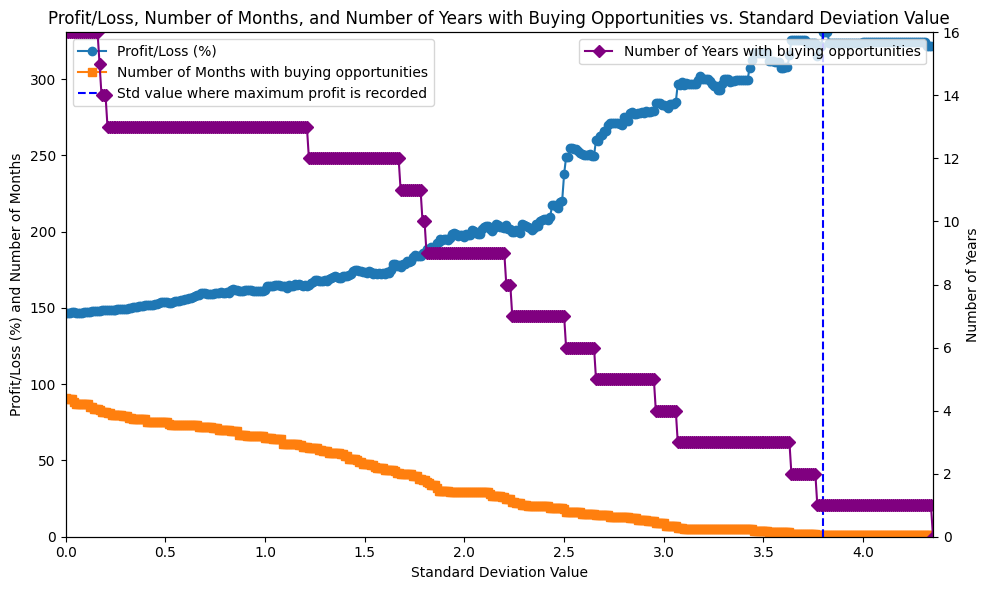

In [25]:
# Convert the dictionaries to lists
std_value_list = list(profit_list.keys())
profit_values = list(profit_list.values())
num_months_values = list(num_months_list.values())
num_years_values = [len(years) for years in num_years_list.values()]  # Count the number of years for each standard deviation value

# Set up to plot the data on the same figure
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin y-axis for num_years_values

# Plot profit_list against std_value with a circle marker ('o')
ax1.plot(std_value_list, profit_values, marker='o', linestyle='-', label='Profit/Loss (%)')

# Plot num_months_list against std_value with a square marker ('s')
ax1.plot(std_value_list, num_months_values, marker='s', linestyle='-', label='Number of Months with buying opportunities')

# Plot num_years_list against std_value with a diamond marker ('D') on the secondary y-axis
ax2.plot(std_value_list, num_years_values, marker='D', linestyle='-', label='Number of Years with buying opportunities', color='purple')

# Plot a vertical line to mark when the maximum profit is recorded
ax1.axvline(x=best_std_val, color='b', linestyle='--', label='Std value where maximum profit is recorded')

# Set the limits for both x and y axes to start at 0
ax1.set_xlim(0, max(std_value_list))
ax1.set_ylim(0, max(max(profit_values), max(num_months_values)))
ax2.set_ylim(0, max(num_years_values))

# Labels for y-axes
ax1.set_ylabel('Profit/Loss (%) and Number of Months')
ax2.set_ylabel('Number of Years')

# Title and legend
ax1.set_xlabel('Standard Deviation Value')
ax1.set_title('Profit/Loss, Number of Months, and Number of Years with Buying Opportunities vs. Standard Deviation Value')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('figures/entrypoints/semi_int_rule_tradeoff.png')
plt.show()


---

# Next, predictive rules based on feature importance for xgboost was used to identify the local bottoms of SPY.

# Rule 1: if current value>moving average + 1.96SD (365 day window) for aaavstreasury and vix, buy 

### Run rule 1 on aaavstreasury

In [26]:
aaavstreasury['Moving Average'] = aaavstreasury['aaaVsTreasury'].rolling(window=365).mean()
aaavstreasury['Moving std'] = aaavstreasury['aaaVsTreasury'].rolling(window=365).std()
aaavstreasury

,Date,aaaVsTreasury,Moving Average,Moving std
3999,1999-01-04,1.55,NaN,NaN
4000,1999-01-05,1.54,NaN,NaN
4001,1999-01-06,1.54,NaN,NaN
4002,1999-01-07,1.52,NaN,NaN
4003,1999-01-08,1.48,NaN,NaN
...,...,...,...,...
10143,2023-08-01,0.71,1.034082,0.180055
10144,2023-08-02,0.75,1.032630,0.180203
10145,2023-08-03,0.80,1.031370,0.180217
10146,2023-08-04,0.83,1.030027,0.179886


In [27]:
aaavstreasury['Value matches rule'] = aaavstreasury['aaaVsTreasury'] > (aaavstreasury['Moving Average'] + 1.96*aaavstreasury['Moving std'])
aaavstreasury

,Date,aaaVsTreasury,Moving Average,Moving std,Value matches rule
3999,1999-01-04,1.55,NaN,NaN,False
4000,1999-01-05,1.54,NaN,NaN,False
4001,1999-01-06,1.54,NaN,NaN,False
4002,1999-01-07,1.52,NaN,NaN,False
4003,1999-01-08,1.48,NaN,NaN,False
...,...,...,...,...,...
10143,2023-08-01,0.71,1.034082,0.180055,False
10144,2023-08-02,0.75,1.032630,0.180203,False
10145,2023-08-03,0.80,1.031370,0.180217,False
10146,2023-08-04,0.83,1.030027,0.179886,False


In [28]:
filtered_rule1valid_aaavstreasury = aaavstreasury[aaavstreasury['Value matches rule']]
filtered_rule1valid_aaavstreasury = filtered_rule1valid_aaavstreasury.dropna()
filtered_rule1valid_aaavstreasury

,Date,aaaVsTreasury,Moving Average,Moving std,Value matches rule
4402,2000-08-09,1.74,1.416959,0.148017,True
4403,2000-08-10,1.76,1.418219,0.148974,True
4404,2000-08-11,1.75,1.419370,0.149910,True
4405,2000-08-14,1.75,1.420548,0.150814,True
4406,2000-08-15,1.73,1.421671,0.151588,True
...,...,...,...,...,...
9314,2020-04-03,2.01,1.286822,0.273278,True
9315,2020-04-06,1.96,1.289616,0.274932,True
9336,2020-05-06,1.89,1.328192,0.286507,True
9339,2020-05-11,1.96,1.334384,0.290666,True


In [29]:
dates_for_aaaVsTreasury_ruleMatched = filtered_rule1valid_aaavstreasury['Date']
dates_for_aaaVsTreasury_ruleMatched_df = dates_for_aaaVsTreasury_ruleMatched.to_frame()
dates_for_aaaVsTreasury_ruleMatched_df

,Date
4402,2000-08-09
4403,2000-08-10
4404,2000-08-11
4405,2000-08-14
4406,2000-08-15
...,...
9314,2020-04-03
9315,2020-04-06
9336,2020-05-06
9339,2020-05-11


### Run rule 1 on vix

In [30]:
vix['Moving Average'] = vix['vix'].rolling(window=365).median()
vix['Moving std'] = vix['vix'].rolling(window=365).std()
vix

,Date,vix,Moving Average,Moving std
2273,1999-01-04,26.17,NaN,NaN
2274,1999-01-05,24.46,NaN,NaN
2275,1999-01-06,23.34,NaN,NaN
2276,1999-01-07,24.37,NaN,NaN
2277,1999-01-08,23.28,NaN,NaN
...,...,...,...,...
8468,2023-08-02,16.09,22.01,5.389121
8469,2023-08-03,15.92,21.97,5.377098
8470,2023-08-04,17.10,21.97,5.334015
8471,2023-08-07,15.77,21.95,5.303330


In [31]:
vix['Value matches rule'] = vix['vix'] > (vix['Moving Average'] + 1.96*vix['Moving std'])
vix

,Date,vix,Moving Average,Moving std,Value matches rule
2273,1999-01-04,26.17,NaN,NaN,False
2274,1999-01-05,24.46,NaN,NaN,False
2275,1999-01-06,23.34,NaN,NaN,False
2276,1999-01-07,24.37,NaN,NaN,False
2277,1999-01-08,23.28,NaN,NaN,False
...,...,...,...,...,...
8468,2023-08-02,16.09,22.01,5.389121,False
8469,2023-08-03,15.92,21.97,5.377098,False
8470,2023-08-04,17.10,21.97,5.334015,False
8471,2023-08-07,15.77,21.95,5.303330,False


In [32]:
filtered_rule1valid_vix = vix[vix['Value matches rule']]
filtered_rule1valid_vix = filtered_rule1valid_vix.dropna()
filtered_rule1valid_vix

,Date,vix,Moving Average,Moving std,Value matches rule
2722,2000-10-12,30.51,22.77,2.935247,True
2726,2000-10-18,28.72,22.77,2.957337,True
2732,2000-10-26,28.62,22.77,2.950406,True
2743,2000-11-10,28.53,22.77,2.919360,True
2744,2000-11-13,29.06,22.77,2.936831,True
...,...,...,...,...,...
8252,2022-09-29,31.84,21.44,5.143292,True
8253,2022-09-30,31.62,21.44,5.159597,True
8259,2022-10-10,32.45,21.67,5.231102,True
8260,2022-10-11,33.63,21.77,5.257911,True


In [33]:
dates_for_vix_ruleMatched = filtered_rule1valid_vix['Date']
dates_for_vix_ruleMatched_df = dates_for_vix_ruleMatched.to_frame()
dates_for_vix_ruleMatched_df

,Date
2722,2000-10-12
2726,2000-10-18
2732,2000-10-26
2743,2000-11-10
2744,2000-11-13
...,...
8252,2022-09-29
8253,2022-09-30
8259,2022-10-10
8260,2022-10-11


### Select only common rows/months from ruleValid dataframes of vix and AAAVsTreasury using merge()

In [34]:
common_rows_for_rule1 = dates_for_vix_ruleMatched_df.merge(dates_for_aaaVsTreasury_ruleMatched_df, how='inner')
common_rows_for_rule1

,Date
0,2000-10-18
1,2000-12-20
2,2000-12-21
3,2001-01-02
4,2001-01-08
...,...
209,2020-03-31
210,2020-04-01
211,2020-04-02
212,2020-04-03


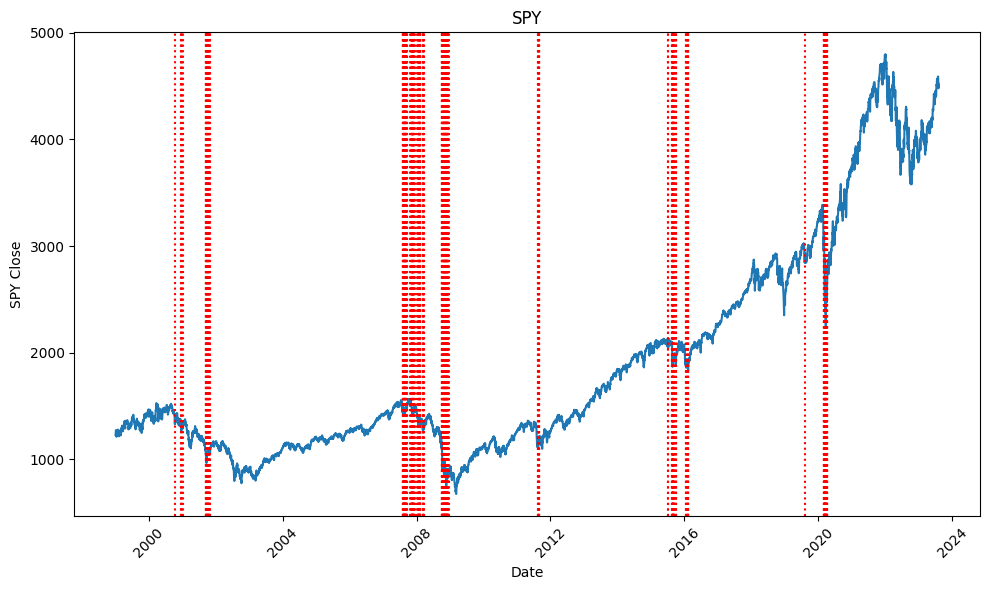

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Close'])
plt.xlabel('Date')
plt.ylabel('SPY Close')
plt.title('SPY')
plt.xticks(rotation=45)

# Add vertical lines for MonthYear values
for date in common_rows_for_rule1['Date']:
    plt.axvline(x=date, color='r', linestyle=':')

plt.tight_layout()
plt.savefig('figures/entrypoints/predictive_rule1.png')
plt.show()


In [36]:
# Merge common_rows_for_rule1 with spy_data to get the close prices for each date
spy_close_for_common_rows_for_rule1 = common_rows_for_rule1.merge(spy_data, on='Date', how='left')

# Print the DataFrame with Date and Close columns
print(spy_close_for_common_rows_for_rule1[['Date', 'Close']])


          Date        Close
0   2000-10-18  1342.130005
1   2000-12-20  1264.739990
2   2000-12-21  1274.859985
3   2001-01-02  1283.270020
4   2001-01-08  1295.859985
..         ...          ...
209 2020-03-31  2584.590088
210 2020-04-01  2470.500000
211 2020-04-02  2526.899902
212 2020-04-03  2488.649902
213 2020-04-06  2663.679932

[214 rows x 2 columns]


In [37]:
eval_spy_stratergy(2000, 2022, end_price_2022_dec, spy_close_for_common_rows_for_rule1, "Close", False)

=====
The end of year price for 2022 is $3839.5
The average price of SPY in your portfolio would be: $1491.9916801096124
The number of buying opportunites from 2000 to 2022 are: 214
% profit/loss = 157.34%
9 years and 27 months with buying opportunities: [2000, 2001, 2007, 2008, 2011, 2015, 2016, 2019, 2020]
=====


(157.3405771081728, [2000, 2001, 2007, 2008, 2011, 2015, 2016, 2019, 2020], 27)

# Rule 2: if current value>moving average + 1.96SD (365 day window) for aaavstreasury and vix, (oil prices and unecmploment rate for that month is moving avg (12months+1.96SD)) and (t10y3m < moving average - 1.96SD (365 day window)) buy 

rule 2 is a stricter version of rule 1

### Run rule 2 on t10y3m

In [38]:
t10y3m['Moving Average'] = t10y3m['t10y3m'].rolling(window=365).median()
t10y3m['Moving std'] = t10y3m['t10y3m'].rolling(window=365).std()
t10y3m

,Date,t10y3m,Moving Average,Moving std
4248,1999-01-04,0.20,NaN,NaN
4249,1999-01-05,0.26,NaN,NaN
4250,1999-01-06,0.26,NaN,NaN
4251,1999-01-07,0.33,NaN,NaN
4252,1999-01-08,0.38,NaN,NaN
...,...,...,...,...
10398,2023-08-02,-1.45,-0.17,1.319791
10399,2023-08-03,-1.34,-0.17,1.318024
10400,2023-08-04,-1.49,-0.46,1.316751
10401,2023-08-07,-1.47,-0.46,1.315511


In [39]:
t10y3m['Value matches rule'] = t10y3m['t10y3m'] < (t10y3m['Moving Average'] - 1.96*t10y3m['Moving std'])
t10y3m

,Date,t10y3m,Moving Average,Moving std,Value matches rule
4248,1999-01-04,0.20,NaN,NaN,False
4249,1999-01-05,0.26,NaN,NaN,False
4250,1999-01-06,0.26,NaN,NaN,False
4251,1999-01-07,0.33,NaN,NaN,False
4252,1999-01-08,0.38,NaN,NaN,False
...,...,...,...,...,...
10398,2023-08-02,-1.45,-0.17,1.319791,False
10399,2023-08-03,-1.34,-0.17,1.318024,False
10400,2023-08-04,-1.49,-0.46,1.316751,False
10401,2023-08-07,-1.47,-0.46,1.315511,False


In [40]:
filtered_rule2valid_t10y3m = t10y3m[t10y3m['Value matches rule']]
filtered_rule2valid_t10y3m = filtered_rule2valid_t10y3m.dropna()
filtered_rule2valid_t10y3m

,Date,t10y3m,Moving Average,Moving std,Value matches rule
4624,2000-06-30,0.15,0.83,0.344801,True
4625,2000-07-03,0.00,0.83,0.346549,True
4626,2000-07-05,0.00,0.83,0.347940,True
4627,2000-07-06,0.03,0.83,0.348944,True
4628,2000-07-07,-0.03,0.83,0.350306,True
...,...,...,...,...,...
10311,2023-03-29,-1.23,1.06,1.127085,True
10312,2023-03-30,-1.42,1.03,1.131195,True
10313,2023-03-31,-1.37,0.92,1.135033,True
10314,2023-04-03,-1.47,0.81,1.139378,True


In [41]:
dates_for_t10y3m_ruleMatched = filtered_rule2valid_t10y3m['Date']
dates_for_t10y3m_ruleMatched_df = dates_for_t10y3m_ruleMatched.to_frame()
dates_for_t10y3m_ruleMatched_df

,Date
4624,2000-06-30
4625,2000-07-03
4626,2000-07-05
4627,2000-07-06
4628,2000-07-07
...,...
10311,2023-03-29
10312,2023-03-30
10313,2023-03-31
10314,2023-04-03


In [42]:
common_rows_for_rule2 = common_rows_for_rule1.merge(dates_for_t10y3m_ruleMatched_df, how='inner')
common_rows_for_rule2

,Date
0,2000-10-18
1,2001-01-02
2,2011-08-17
3,2011-08-18
4,2011-08-23
5,2011-08-25
6,2011-08-26
7,2016-01-20
8,2016-01-21
9,2016-01-25


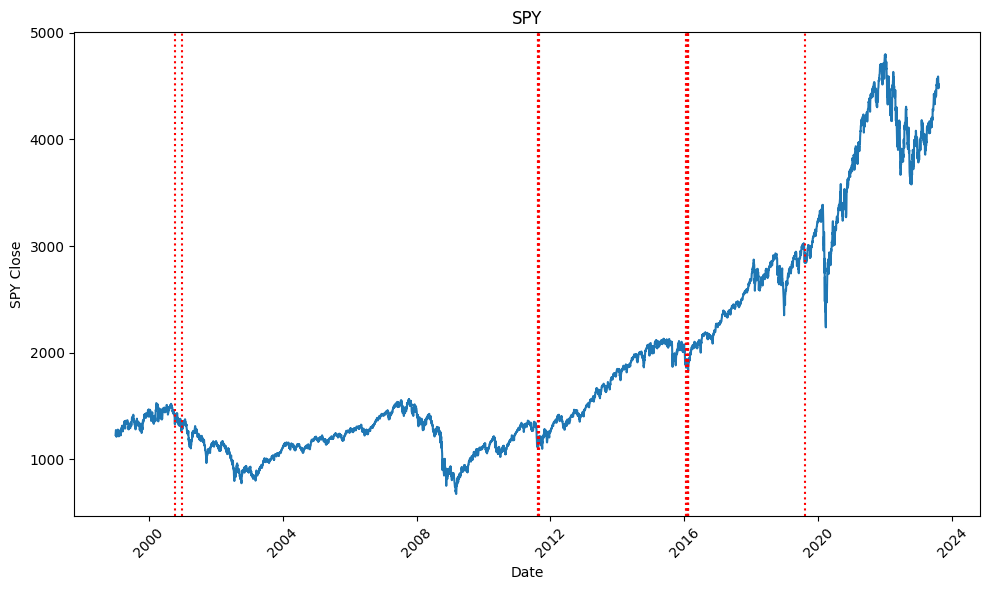

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Close'])
plt.xlabel('Date')
plt.ylabel('SPY Close')
plt.title('SPY')
plt.xticks(rotation=45)

# Add vertical lines for MonthYear values
for date in common_rows_for_rule2['Date']:
    plt.axvline(x=date, color='r', linestyle=':')

plt.tight_layout()
plt.show()


In [44]:
# Merge common_rows_for_rule1 with spy_data to get the close prices for each date
spy_close_for_common_rows_for_rule2 = common_rows_for_rule2.merge(spy_data, on='Date', how='left')

# Print the DataFrame with Date and Close columns
print(spy_close_for_common_rows_for_rule2[['Date', 'Close']])


         Date        Close
0  2000-10-18  1342.130005
1  2001-01-02  1283.270020
2  2011-08-17  1193.890015
3  2011-08-18  1140.650024
4  2011-08-23  1162.349976
5  2011-08-25  1159.270020
6  2011-08-26  1176.800049
7  2016-01-20  1859.329956
8  2016-01-21  1868.989990
9  2016-01-25  1877.079956
10 2016-02-08  1853.439941
11 2016-02-09  1852.209961
12 2016-02-10  1851.859985
13 2016-02-11  1829.079956
14 2016-02-12  1864.780029
15 2019-08-05  2844.739990


In [45]:
eval_spy_stratergy(2000, 2022, end_price_2022_dec, spy_close_for_common_rows_for_rule2, "Close", False)

=====
The end of year price for 2022 is $3839.5
The average price of SPY in your portfolio would be: $1634.9918670654297
The number of buying opportunites from 2000 to 2022 are: 16
% profit/loss = 134.83%
5 years and 6 months with buying opportunities: [2000, 2001, 2011, 2016, 2019]
=====


(134.83297240440336, [2000, 2001, 2011, 2016, 2019], 6)

Unforunately, the relationship between t10y3m and SPY seem to be unclear based on previous analysis and the current rule applied to it does not accurately predict the local bottoms, so it will be discarded from rule 2.

---

### Run rule 2 on unemp_rate

In [46]:
unemp_rate['Moving Average'] = unemp_rate['unemp_rate'].rolling(window=12).median()
unemp_rate['Moving std'] = unemp_rate['unemp_rate'].rolling(window=12).std()
unemp_rate


,Date,unemp_rate,Moving Average,Moving std
612,1999-01-01,4.3,NaN,NaN
613,1999-02-01,4.4,NaN,NaN
614,1999-03-01,4.2,NaN,NaN
615,1999-04-01,4.3,NaN,NaN
616,1999-05-01,4.2,NaN,NaN
...,...,...,...,...
902,2023-03-01,3.5,3.60,0.088763
903,2023-04-01,3.4,3.55,0.100000
904,2023-05-01,3.7,3.55,0.108362
905,2023-06-01,3.6,3.55,0.108362


In [47]:
unemp_rate['Value matches rule'] = unemp_rate['unemp_rate'] > (unemp_rate['Moving Average'] + 1.96*unemp_rate['Moving std'])
unemp_rate


,Date,unemp_rate,Moving Average,Moving std,Value matches rule
612,1999-01-01,4.3,NaN,NaN,False
613,1999-02-01,4.4,NaN,NaN,False
614,1999-03-01,4.2,NaN,NaN,False
615,1999-04-01,4.3,NaN,NaN,False
616,1999-05-01,4.2,NaN,NaN,False
...,...,...,...,...,...
902,2023-03-01,3.5,3.60,0.088763,False
903,2023-04-01,3.4,3.55,0.100000,False
904,2023-05-01,3.7,3.55,0.108362,False
905,2023-06-01,3.6,3.55,0.108362,False


In [48]:
filtered_rule2valid_unemp_rate = unemp_rate[unemp_rate['Value matches rule']]
filtered_rule2valid_unemp_rate = filtered_rule2valid_unemp_rate.dropna()
filtered_rule2valid_unemp_rate


,Date,unemp_rate,Moving Average,Moving std,Value matches rule
638,2001-03-01,4.3,4.00,0.152753,True
639,2001-04-01,4.4,4.00,0.172328,True
643,2001-08-01,4.9,4.25,0.320511,True
645,2001-10-01,5.3,4.35,0.429499,True
646,2001-11-01,5.5,4.45,0.485159,True
647,2001-12-01,5.7,4.55,0.528219,True
658,2002-11-01,5.9,5.70,0.079296,True
659,2002-12-01,6.0,5.75,0.102986,True
665,2003-06-01,6.3,5.90,0.180907,True
719,2007-12-01,5.0,4.60,0.164225,True


In [49]:
dates_for_unemp_rate_ruleMatched = filtered_rule2valid_unemp_rate['Date']
dates_for_unemp_rate_ruleMatched_df = dates_for_unemp_rate_ruleMatched.to_frame()
dates_for_unemp_rate_ruleMatched_df

,Date
638,2001-03-01
639,2001-04-01
643,2001-08-01
645,2001-10-01
646,2001-11-01
647,2001-12-01
658,2002-11-01
659,2002-12-01
665,2003-06-01
719,2007-12-01


In [50]:
dates_for_unemp_rate_ruleMatched_df['Date'] = pd.to_datetime(dates_for_unemp_rate_ruleMatched_df['Date'])

# Function to generate a sequence of dates covering the entire month
def get_dates_for_month(year, month):
    start_date = pd.to_datetime(f"{year}-{month}-01")
    end_date = start_date + pd.offsets.MonthEnd(0)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    return dates

# Create an empty DataFrame to hold the results
dates_for_unemp_rate_ruleMatched_daily_df = pd.DataFrame()

for _, row in dates_for_unemp_rate_ruleMatched_df.iterrows():
    year = row['Date'].year
    month = row['Date'].month
    dates_for_month = get_dates_for_month(year, month)
    month_dates_df = pd.DataFrame({'Date': dates_for_month})
    dates_for_unemp_rate_ruleMatched_daily_df = pd.concat([dates_for_unemp_rate_ruleMatched_daily_df, month_dates_df], ignore_index=True)

print(dates_for_unemp_rate_ruleMatched_daily_df)


          Date
0   2001-03-01
1   2001-03-02
2   2001-03-03
3   2001-03-04
4   2001-03-05
..         ...
728 2020-05-27
729 2020-05-28
730 2020-05-29
731 2020-05-30
732 2020-05-31

[733 rows x 1 columns]


Need to forward fill betwen dates and for the last entry till the last day of the month

## Run rule 2 on oil_prices

In [51]:
oil_prices['Moving Average'] = oil_prices['oilPrice'].rolling(window=12).median()
oil_prices['Moving std'] = oil_prices['oilPrice'].rolling(window=12).std()
oil_prices

oil_prices['Value matches rule'] = oil_prices['oilPrice'] < (oil_prices['Moving Average'] - 1.96*oil_prices['Moving std'])
oil_prices

filtered_rule2valid_oil_prices = oil_prices[oil_prices['Value matches rule']]
filtered_rule2valid_oil_prices = filtered_rule2valid_oil_prices.dropna()
filtered_rule2valid_oil_prices

dates_for_oil_prices_ruleMatched = filtered_rule2valid_oil_prices['Date']
dates_for_oil_prices_ruleMatched_df = dates_for_oil_prices_ruleMatched.to_frame()
dates_for_oil_prices_ruleMatched_df

,Date
142,2001-11-01
143,2001-12-01
226,2008-11-01
227,2008-12-01
297,2014-10-01
298,2014-11-01
299,2014-12-01
300,2015-01-01
301,2015-02-01
346,2018-11-01


In [52]:
dates_for_oil_prices_ruleMatched_df['Date'] = pd.to_datetime(dates_for_oil_prices_ruleMatched_df['Date'])

# Function to generate a sequence of dates covering the entire month
""" def get_dates_for_month(year, month):
    start_date = pd.to_datetime(f"{year}-{month}-01")
    end_date = start_date + pd.offsets.MonthEnd(0)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    return dates """

# Create an empty DataFrame to hold the results
dates_for_oil_prices_ruleMatched_daily_df = pd.DataFrame()

for _, row in dates_for_oil_prices_ruleMatched_df.iterrows():
    year = row['Date'].year
    month = row['Date'].month
    dates_for_month = get_dates_for_month(year, month)
    month_dates_df = pd.DataFrame({'Date': dates_for_month})
    dates_for_oil_prices_ruleMatched_daily_df = pd.concat([dates_for_oil_prices_ruleMatched_daily_df, month_dates_df], ignore_index=True)

print(dates_for_oil_prices_ruleMatched_daily_df)


          Date
0   2001-11-01
1   2001-11-02
2   2001-11-03
3   2001-11-04
4   2001-11-05
..         ...
421 2020-04-26
422 2020-04-27
423 2020-04-28
424 2020-04-29
425 2020-04-30

[426 rows x 1 columns]


In [53]:
merged_df = pd.concat([dates_for_oil_prices_ruleMatched_daily_df, dates_for_unemp_rate_ruleMatched_daily_df])
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.sort_values(by='Date')
merged_df = merged_df.reset_index(drop=True)
merged_df

,Date
0,2001-03-01
1,2001-03-02
2,2001-03-03
3,2001-03-04
4,2001-03-05
...,...
971,2020-05-27
972,2020-05-28
973,2020-05-29
974,2020-05-30


In [54]:
common_rows_for_rule2 = common_rows_for_rule1.merge(merged_df, how='inner')
common_rows_for_rule2

,Date
0,2001-10-01
1,2001-10-05
2,2001-10-09
3,2001-10-12
4,2001-10-15
...,...
83,2020-03-31
84,2020-04-01
85,2020-04-02
86,2020-04-03


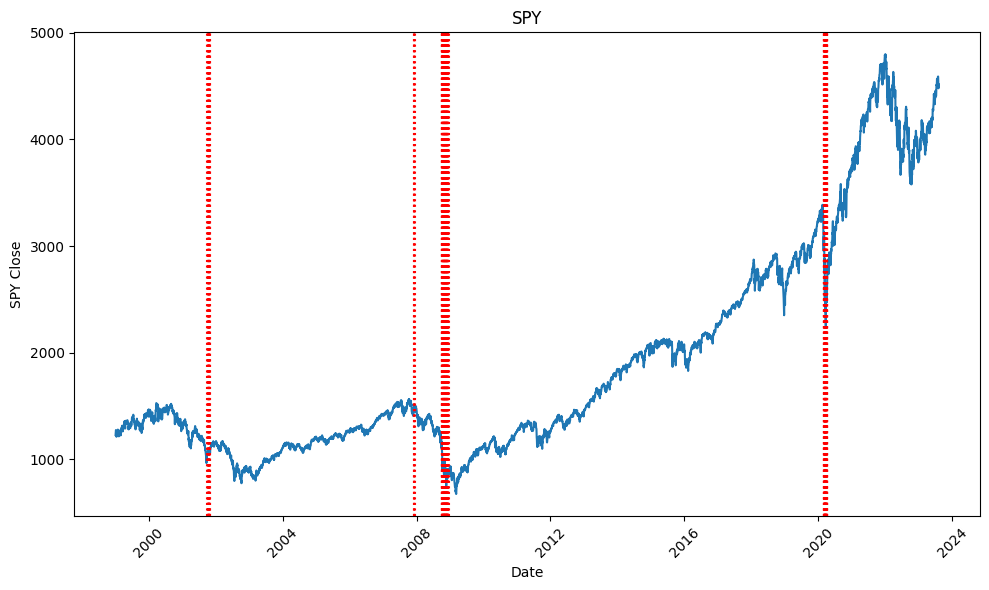

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Close'])
plt.xlabel('Date')
plt.ylabel('SPY Close')
plt.title('SPY')
plt.xticks(rotation=45)

# Add vertical lines for MonthYear values
for date in common_rows_for_rule2['Date']:
    plt.axvline(x=date, color='r', linestyle=':')

plt.tight_layout()
plt.savefig('figures/entrypoints/predictive_rule2.png')
plt.show()


In [56]:
# Merge common_rows_for_rule1 with spy_data to get the close prices for each date
spy_close_for_common_rows_for_rule2 = common_rows_for_rule2.merge(spy_data, on='Date', how='left')

# Print the DataFrame with Date and Close columns
print(spy_close_for_common_rows_for_rule2[['Date', 'Close']])


         Date        Close
0  2001-10-01  1038.550049
1  2001-10-05  1071.380005
2  2001-10-09  1056.750000
3  2001-10-12  1091.650024
4  2001-10-15  1089.979980
..        ...          ...
83 2020-03-31  2584.590088
84 2020-04-01  2470.500000
85 2020-04-02  2526.899902
86 2020-04-03  2488.649902
87 2020-04-06  2663.679932

[88 rows x 2 columns]


In [57]:
eval_spy_stratergy(2000, 2022, end_price_2022_dec, spy_close_for_common_rows_for_rule2, "Close", False)

=====
The end of year price for 2022 is $3839.5
The average price of SPY in your portfolio would be: $1459.3629531860352
The number of buying opportunites from 2000 to 2022 are: 88
% profit/loss = 163.09%
4 years and 7 months with buying opportunities: [2001, 2007, 2008, 2020]
=====


(163.094248871929, [2001, 2007, 2008, 2020], 7)